**Valantine Mwai - KPSK-DeKUT-2-8**

**Winfred Ngure - KPSK-DeKUT-2-33**

**Brian Mutwiri - KPSK-DeKUT-2-27**

**Alvin Ondieki - KPSK-DeKUT-2-19**

**Zipporah Mutua**

In [36]:
#uses k-means, Gaussian Mixture Model(GMM) and DBSCAN in different Scenarios and Features


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

In [2]:
data=pd.read_csv('datasets/cluster/Wholesale customers data.csv')

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
data.duplicated().sum()

np.int64(0)

<Axes: >

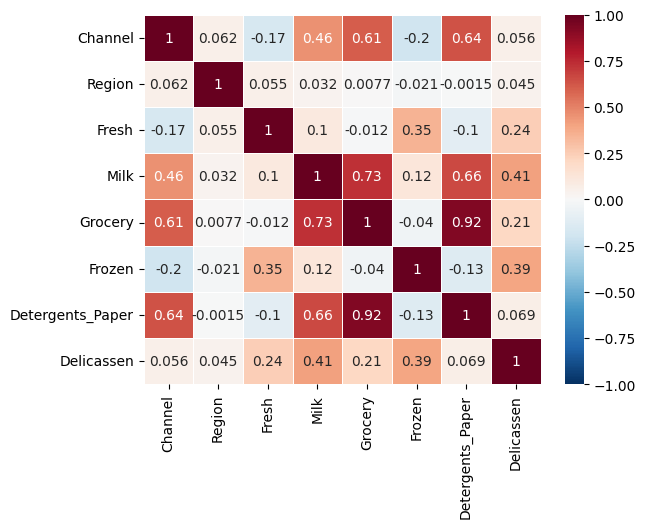

In [8]:
sns.heatmap(data.corr(), 
            annot=True,
           cmap="RdBu_r",  # Red-Blue colormap for distinct correlation colors
            center=0,        # Neutral color for weak correlations
            linewidths=0.5, 
            vmin=-1, vmax=1  # Set range from -1 to 1
           )

<Axes: xlabel='Region', ylabel='count'>

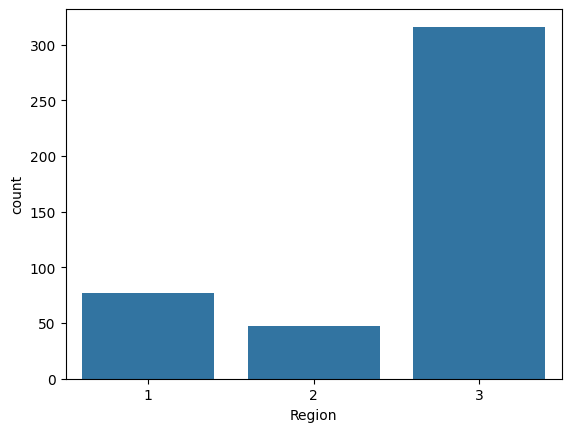

In [9]:
sns.countplot(x='Region',
              data=data)

In [10]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

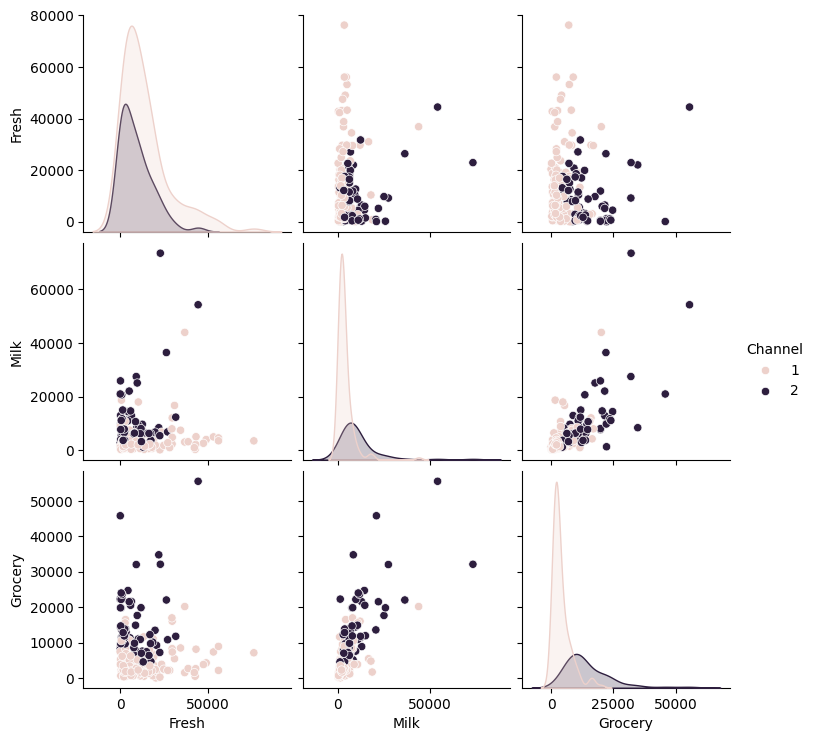

In [11]:
sns.pairplot(data.sample(200), 
             vars=['Fresh','Milk','Grocery'], 
             hue='Channel')
plt.savefig('eexpalin.png')
plt.show()

In [12]:
data['Channel'].unique()

array([2, 1])

In [13]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

([0, 1, 2], [Text(0, 0, 'Fresh'), Text(1, 0, 'Milk'), Text(2, 0, 'Grocery')])

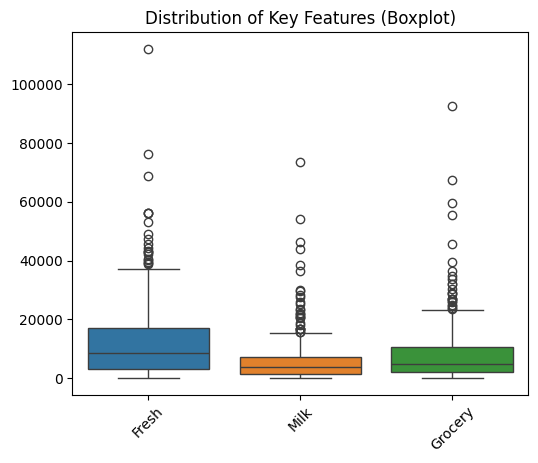

In [14]:
plt.figure(figsize=(20, 16))

#Distribution of Numerical Features (Boxplots)
plt.subplot(3, 3, 1)
sns.boxplot(data=data[['Fresh', 'Milk', 'Grocery']])
plt.title("Distribution of Key Features (Boxplot)")
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '2')])

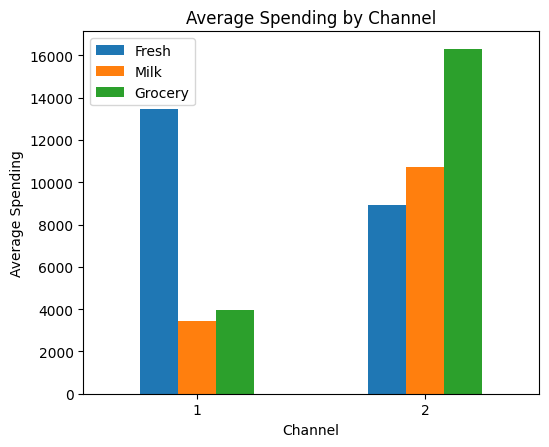

In [15]:
# Channel-wise Comparison (Barplot)
plt.figure(figsize=(20, 16))
plt.subplot(3, 3, 2)
channel_means = data.groupby('Channel')[['Fresh', 'Milk', 'Grocery']].mean()
channel_means.plot(kind='bar', ax=plt.gca())
plt.title("Average Spending by Channel")
plt.ylabel("Average Spending")
plt.xticks(rotation=0)

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

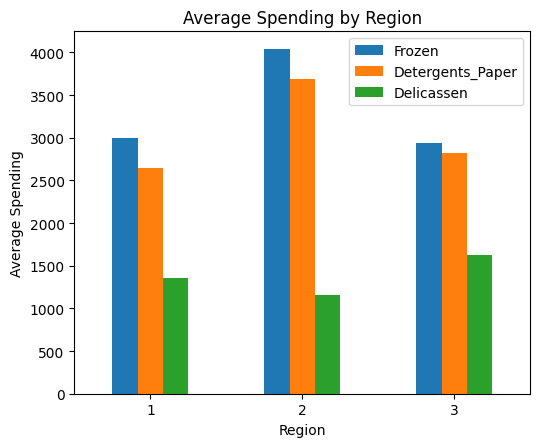

In [16]:
# Region-wise Comparison (Barplot)
plt.figure(figsize=(20, 16))
plt.subplot(3, 3, 3)
region_means = data.groupby('Region')[['Frozen', 'Detergents_Paper', 'Delicassen']].mean()
region_means.plot(kind='bar', ax=plt.gca())
plt.title("Average Spending by Region")
plt.ylabel("Average Spending")
plt.xticks(rotation=0)

Text(0.5, 1.0, 'Grocery vs Milk Spending by Channel')

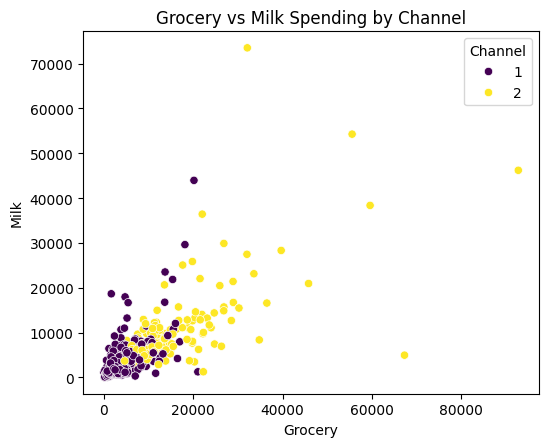

In [17]:
# Pairplot of Key Features (Sample)
plt.figure(figsize=(20, 16))
plt.subplot(3, 3, 5)
sns.scatterplot(data=data, x='Grocery', y='Milk', hue='Channel', palette='viridis')
plt.title("Grocery vs Milk Spending by Channel")

Text(0.5, 0, 'Fresh Products Expenditure')

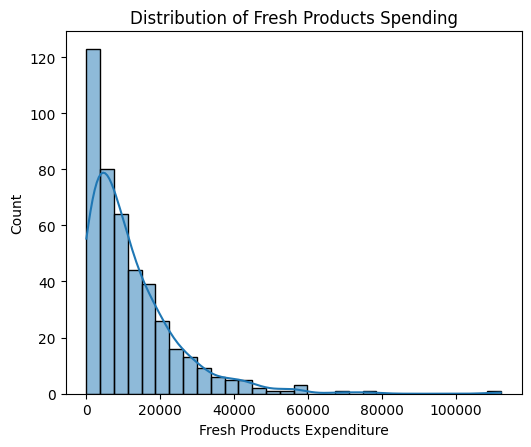

In [18]:
#Distribution of Fresh Products
plt.figure(figsize=(20,16))
plt.subplot(3, 3, 6)
sns.histplot(data['Fresh'], bins=30, kde=True)
plt.title("Distribution of Fresh Products Spending")
plt.xlabel("Fresh Products Expenditure")

([0, 1, 2],
 [Text(0, 0, 'Frozen'),
  Text(1, 0, 'Detergents_Paper'),
  Text(2, 0, 'Delicassen')])

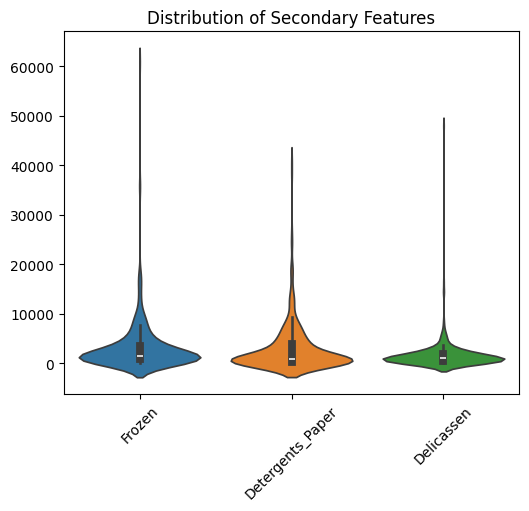

In [19]:
# Time-saving Violin Plot
plt.figure(figsize=(20,16))
plt.subplot(3, 3, 8)
sns.violinplot(data=data[['Frozen', 'Detergents_Paper', 'Delicassen']])
plt.title("Distribution of Secondary Features")
plt.xticks(rotation=45)

Text(1314.8398692810458, 0.5, 'Channel')

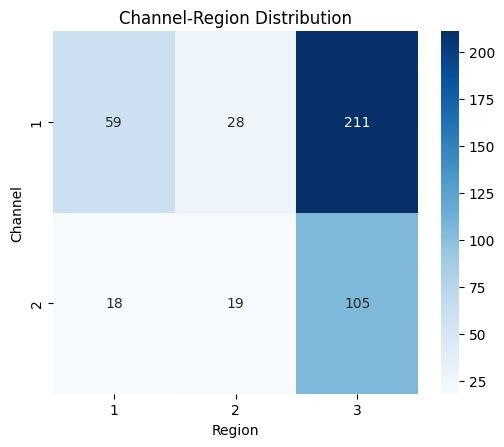

In [20]:
#Channel-Region Cross Analysis
plt.figure(figsize=(20,16))
plt.subplot(3, 3, 9)
cross_tab = pd.crosstab(data['Channel'], data['Region'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title("Channel-Region Distribution")
plt.xlabel("Region")
plt.ylabel("Channel")

**standardization**

In [21]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [22]:
# Define columns
stand_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
unstand_cols = ['Channel', 'Region']

# Scale numerical features
scaler = StandardScaler()
data_scaled = data.copy()
data_scaled[stand_cols] = scaler.fit_transform(data[stand_cols])

In [23]:
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,2,3,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,2,3,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,1,3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,2,3,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [24]:
data1 = data_scaled[['Milk', 'Grocery']]

In [25]:
data1.head()

,Milk,Grocery
0,0.523568,-0.041115
1,0.544458,0.170318
2,0.408538,-0.028157
3,-0.624020,-0.392977
4,-0.052396,-0.079356


**KMEANS**

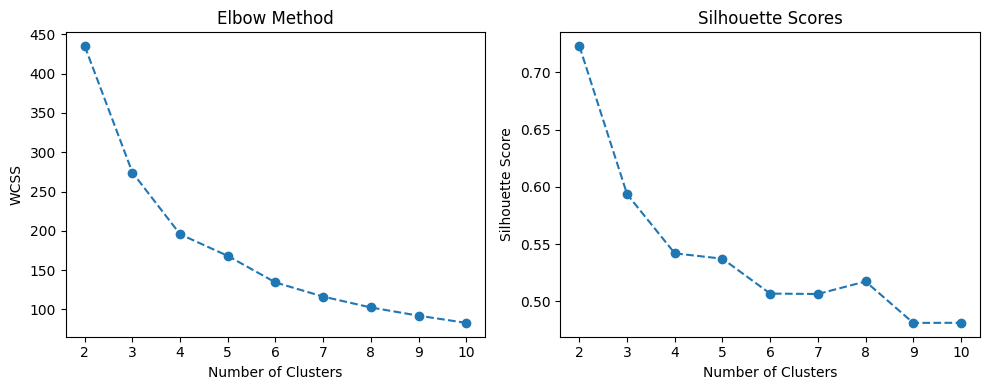

In [26]:
#DETERMING OPTIMAL NUMBER OF CLUSTERS


# Use Elbow Method to find optimal K
wcss = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data1)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data1, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [38]:
# K-Means Clustering
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, 
                random_state=42)
kmeans_pred = kmeans.fit_predict(data1)

# Add cluster labels to the dataframe
data1_kmeans = data1.copy()
data1_kmeans['Cluster'] = kmeans_pred


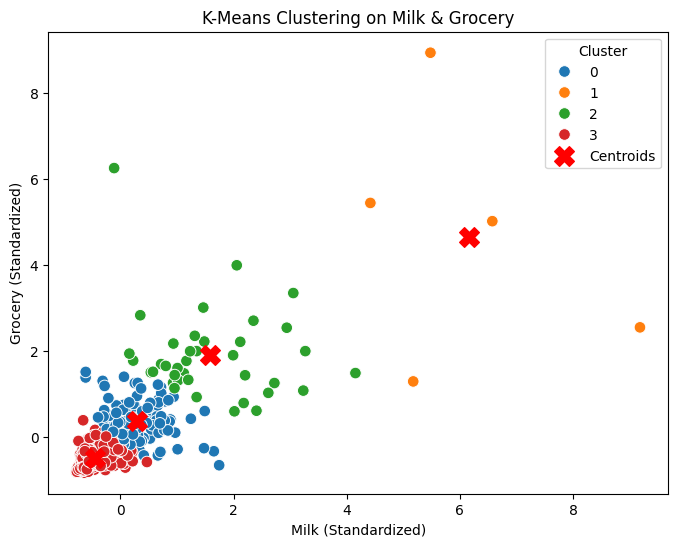

In [39]:
# Plot K-Means clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data1_kmeans['Milk'], 
                y=data1_kmeans['Grocery'], 
                hue=data1_kmeans['Cluster'], 
                palette="tab10", 
                s=70)
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            color='red', marker='X', s=200, 
            label="Centroids")
plt.title("K-Means Clustering on Milk & Grocery")
plt.xlabel("Milk (Standardized)")
plt.ylabel("Grocery (Standardized)")
plt.legend(title="Cluster")
plt.show()


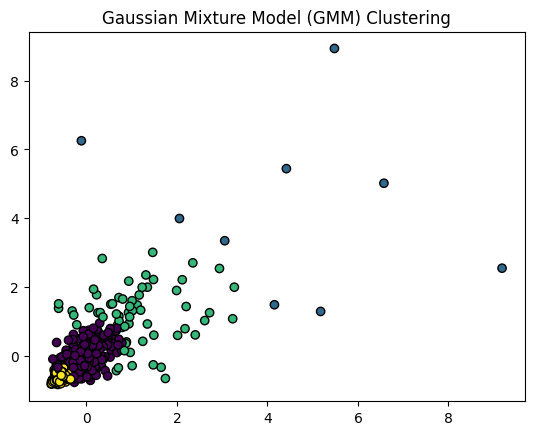

In [29]:
#GaussianMixture Clustering

# Convert to NumPy array
data1_np = data1.to_numpy() 

# Define number of clusters same as K-Means
optimal_k = 4  

gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_pred = gmm.fit_predict(data1)

# Plot the results
plt.scatter(data1_np[:, 0], data1_np[:, 1], c=gmm_pred, cmap='viridis', edgecolors='k')
plt.title("Gaussian Mixture Model (GMM) Clustering")
plt.show()


In [30]:
# K-Means Score
kmeans_silhouette = silhouette_score(data1, kmeans_pred)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.3f}")

# GMM Score
gmm_silhouette = silhouette_score(data1, gmm_pred)
print(f"GMM Silhouette Score: {gmm_silhouette:.3f}")

K-Means Silhouette Score: 0.542
GMM Silhouette Score: 0.406


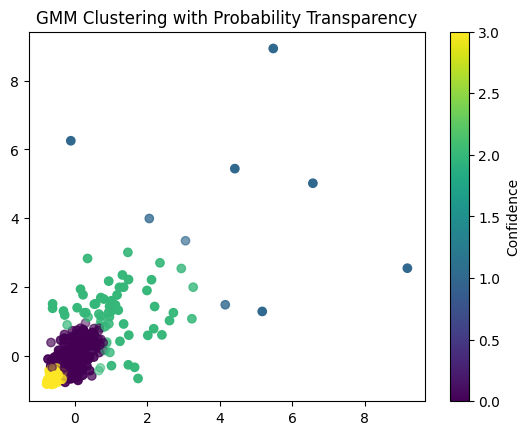

In [31]:
# Get cluster probabilities
probabilities = gmm.predict_proba(data1)

# Choose max probability per point
max_probs = np.max(probabilities, axis=1)

# Scatter plot with transparency based on certainty
plt.scatter(data1_np[:, 0], data1_np[:, 1], c=gmm_pred, cmap='viridis', alpha=max_probs)
plt.title("GMM Clustering with Probability Transparency")
plt.colorbar(label="Confidence")
plt.show()


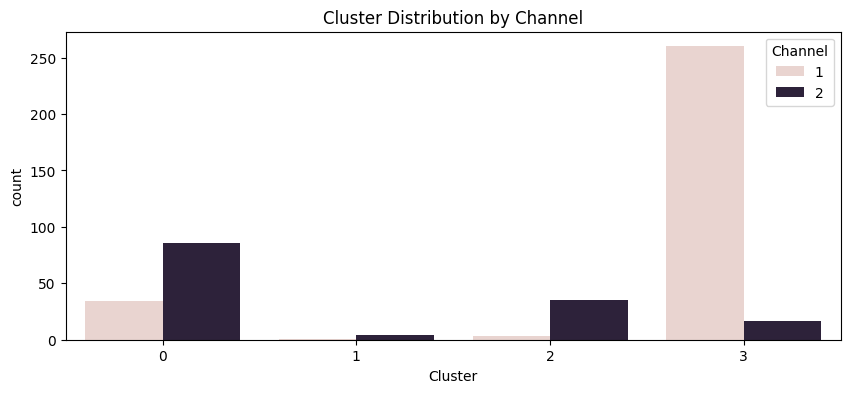

In [34]:
# Cluster-Channel Distribution
plt.figure(figsize=(10, 4))
sns.countplot(x='Cluster', hue='Channel', data=data_scaled)
plt.title("Cluster Distribution by Channel")
plt.show()

In [41]:
#using all features

In [42]:
# Select all numerical features for clustering
data2 = data_scaled[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]


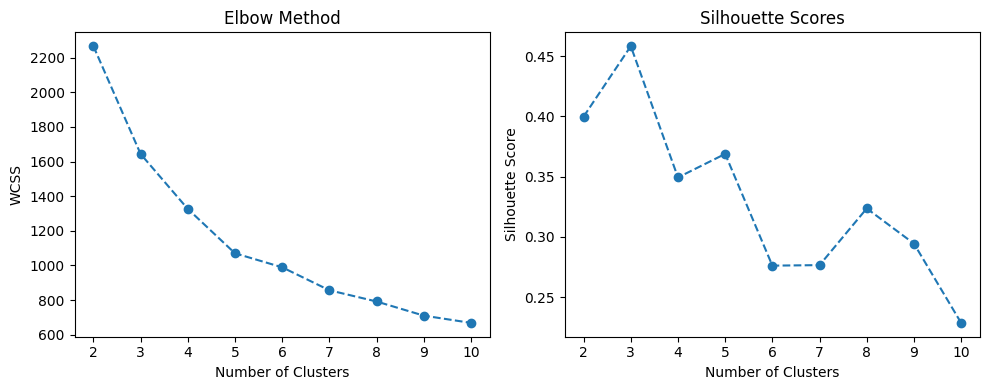

In [43]:
wcss = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data2)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data2, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [54]:
optimal_k = 3  # Adjust based on Elbow Method

kmeans = KMeans(n_clusters=optimal_k, 
                random_state=42)
kmeans_pred = kmeans.fit_predict(data2)

# Add K-Means cluster labels to the dataset
data_scaled['KMeans_Cluster'] = kmeans_pred


In [55]:
gmm = GaussianMixture(n_components=optimal_k, 
                      random_state=42)
gmm_pred = gmm.fit_predict(data2)

# Add GMM clusters to the dataset
data_scaled['GMM_Cluster'] = gmm_pred


In [56]:
kmeans_silhouette = silhouette_score(data2, kmeans_pred)
gmm_silhouette = silhouette_score(data2, gmm_pred)

print(f"K-Means Silhouette Score: {kmeans_silhouette:.3f}")
print(f"GMM Silhouette Score: {gmm_silhouette:.3f}")

K-Means Silhouette Score: 0.458
GMM Silhouette Score: 0.316


Text(0, 0.5, 'Grocery')

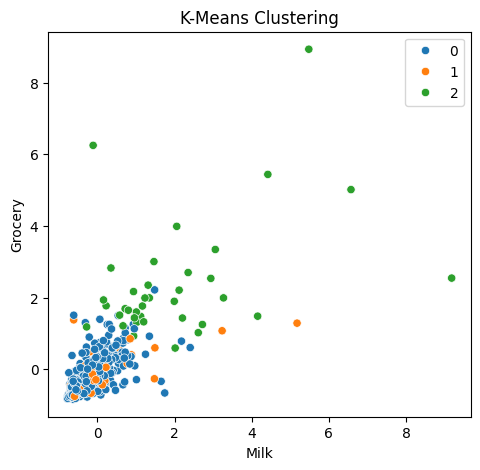

In [59]:
plt.figure(figsize=(12, 5))

# K-Means Clustering
plt.subplot(1, 2, 1)
sns.scatterplot(x=data2['Milk'], 
                y=data2['Grocery'], 
                hue=kmeans_pred, 
                palette="tab10")
plt.title("K-Means Clustering")
plt.xlabel("Milk")
plt.ylabel("Grocery")

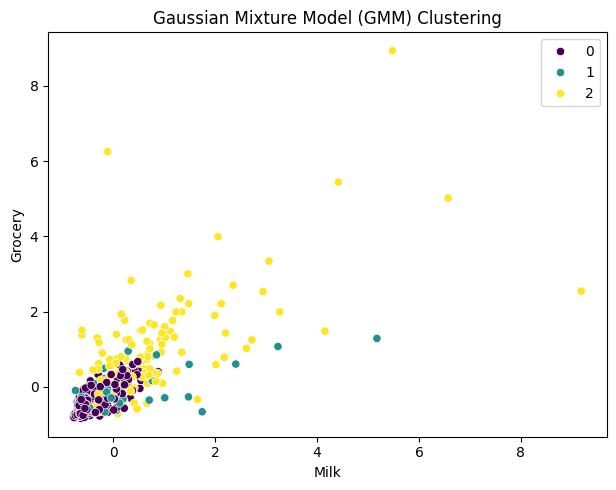

In [61]:
# GMM Clustering
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
sns.scatterplot(x=data2['Milk'], 
                y=data2['Grocery'], 
                hue=gmm_pred, 
                palette="viridis")
plt.title("Gaussian Mixture Model (GMM) Clustering")
plt.xlabel("Milk")
plt.ylabel("Grocery")

plt.tight_layout()
plt.show()

In [63]:
# DBSCAN Model
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, 
                min_samples=5)  # Adjust `eps` based on data
dbscan_pred = dbscan.fit_predict(data2)

# Add DBSCAN cluster labels to dataset
data_scaled['DBSCAN_Cluster'] = dbscan_pred


In [64]:
# Check if DBSCAN found more than one cluster
if len(set(dbscan_pred)) > 1:
    dbscan_silhouette = silhouette_score(data2, dbscan_pred)
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.3f}")
else:
    print("DBSCAN did not find enough clusters for silhouette score.")


DBSCAN Silhouette Score: 0.660


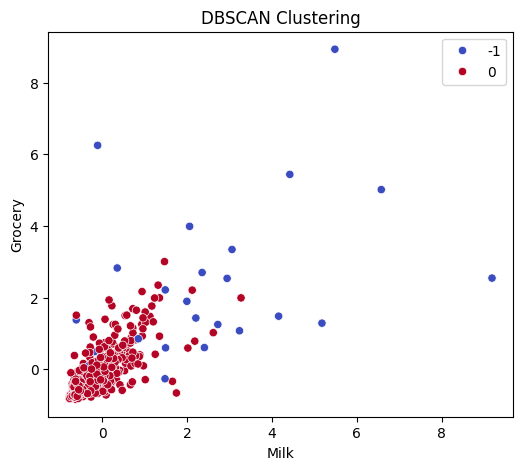

In [65]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x=data2['Milk'], 
                y=data2['Grocery'], 
                hue=dbscan_pred, 
                palette="coolwarm")
plt.title("DBSCAN Clustering")
plt.xlabel("Milk")
plt.ylabel("Grocery")
plt.show()

In [66]:
print(f"K-Means Silhouette Score: {kmeans_silhouette:.3f}")
print(f"GMM Silhouette Score: {gmm_silhouette:.3f}")

if len(set(dbscan_pred)) > 1:
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.3f}")
else:
    print("DBSCAN did not find enough clusters for silhouette score.")

K-Means Silhouette Score: 0.458
GMM Silhouette Score: 0.316
DBSCAN Silhouette Score: 0.660


**Higher silhouette score (closer to 1) → Better-defined clusters.**

**Lower silhouette score (closer to 0) → Poor clustering (overlapping or unclear clusters).**

**Negative silhouette score → Clustering is not meaningful.**

In [73]:
from sklearn.decomposition import PCA
import pandas as pd

# Apply PCA on the standardized data
pca = PCA(n_components=len(data2.columns))  # Use all features
pca.fit(data2)

# Convert PCA components into a DataFrame
pca_components = pd.DataFrame(pca.components_, columns=data2.columns, index=[f'PC{i+1}' for i in range(len(data2.columns))])

# Rank features by importance (sum of absolute component values)
feature_importance = pca_components.abs().sum(axis=0).sort_values(ascending=False)
print("Feature Importance Ranking (PCA):")
print(feature_importance)


Feature Importance Ranking (PCA):
Delicassen          2.218692
Detergents_Paper    2.137344
Grocery             1.976460
Fresh               1.704466
Frozen              1.653104
Milk                1.640483
dtype: float64


In [74]:
data_selected = data2[['Delicassen', 'Detergents_Paper', 'Grocery']]

In [75]:
from sklearn.cluster import KMeans

optimal_k = 4  # Adjust based on previous Elbow Method results
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_pred = kmeans.fit_predict(data_selected)


In [76]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_pred = gmm.fit_predict(data_selected)


In [77]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=5)  # Adjust parameters for best results
dbscan_pred = dbscan.fit_predict(data_selected)


In [78]:
from sklearn.metrics import silhouette_score

# K-Means Silhouette Score
kmeans_silhouette = silhouette_score(data_selected, kmeans_pred)

# GMM Silhouette Score
gmm_silhouette = silhouette_score(data_selected, gmm_pred)

# DBSCAN Silhouette Score
if len(set(dbscan_pred)) > 1:  # Ensure at least two clusters exist
    dbscan_silhouette = silhouette_score(data_selected, dbscan_pred)
else:
    dbscan_silhouette = None  # DBSCAN may not form clusters

# Print the results
print(f"K-Means Silhouette Score (Selected Features): {kmeans_silhouette:.3f}")
print(f"GMM Silhouette Score (Selected Features): {gmm_silhouette:.3f}")
if dbscan_silhouette:
    print(f"DBSCAN Silhouette Score (Selected Features): {dbscan_silhouette:.3f}")
else:
    print("DBSCAN did not form valid clusters for silhouette scoring.")

K-Means Silhouette Score (Selected Features): 0.539
GMM Silhouette Score (Selected Features): 0.374
DBSCAN Silhouette Score (Selected Features): 0.827


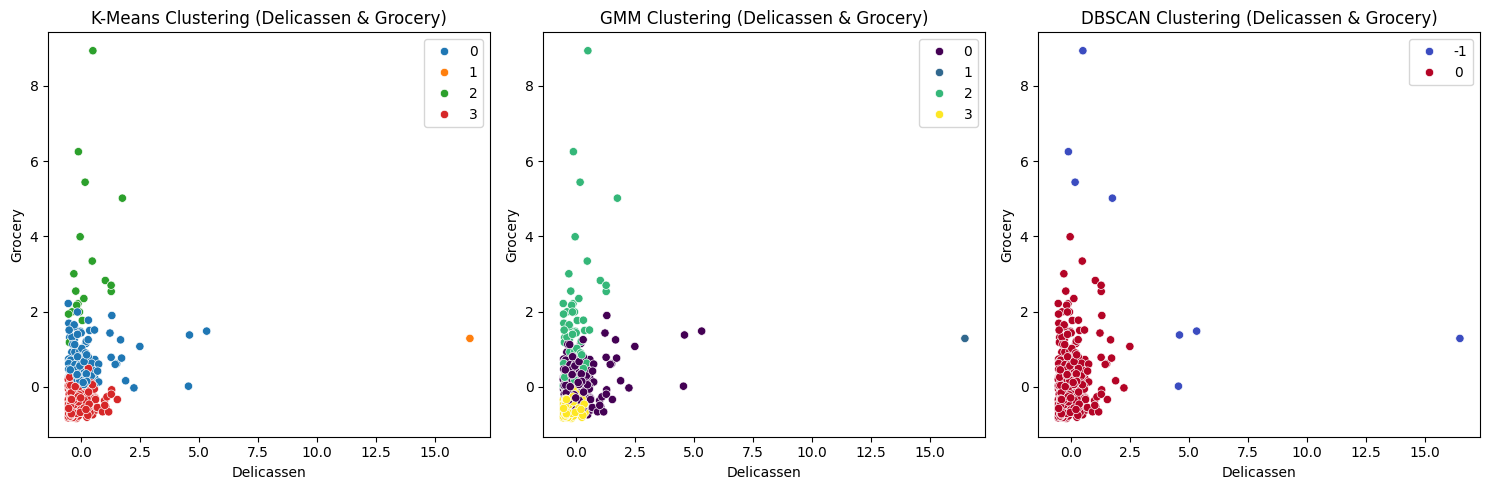

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

# K-Means Clustering
plt.subplot(1, 3, 1)
sns.scatterplot(x=data_selected['Delicassen'], y=data_selected['Grocery'], hue=kmeans_pred, palette="tab10")
plt.title("K-Means Clustering (Delicassen & Grocery)")
plt.xlabel("Delicassen")
plt.ylabel("Grocery")

# GMM Clustering
plt.subplot(1, 3, 2)
sns.scatterplot(x=data_selected['Delicassen'], y=data_selected['Grocery'], hue=gmm_pred, palette="viridis")
plt.title("GMM Clustering (Delicassen & Grocery)")
plt.xlabel("Delicassen")
plt.ylabel("Grocery")

# DBSCAN Clustering
plt.subplot(1, 3, 3)
sns.scatterplot(x=data_selected['Delicassen'], y=data_selected['Grocery'], hue=dbscan_pred, palette="coolwarm")
plt.title("DBSCAN Clustering (Delicassen & Grocery)")
plt.xlabel("Delicassen")
plt.ylabel("Grocery")

plt.tight_layout()
plt.show()